# Computer Vision - Assignment 2 - Convolutional Neural Networks for Image Classification

#### 10 (+3) points   |   Due date: November 25 23:59   |   Submission site: https://pradogrado2223.ugr.es/

### Student's Full Name: JESÚS MIGUEL ROJAS GÓMEZ

The goal of this assignment is to learn how to implement and use CNN models using the Fastai library. 

The goal of this assignmnet is to gain experience designing and training convolutional neural networks, using fast.ai. From a base network architecture that is provided, you have to learn to experiment with it and improve it by adding, modifying or deleting layers from this architecture in the task of classifying images into 25 categories. To carry out this assignment, a help guide is provided to know how:
1. Basic functions of reading data, training and optimization can be performed;
2. Graphs for the evolution of the classification error in
the training and validation sets can be created;
3. The classification error in the test set can be computed.

In [1]:
import sys
import subprocess
import pkg_resources

required = {'nbdev', 'fastbook'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed
print(missing)

if 'nbdev' in missing:
    print("INSTALLING nbdev")
    !pip install nbdev
!pip list |grep nbdev    
if 'fastbook' in missing:
    print("INSTALLING fastbook")
    !pip install -Uqq fastbook
!pip list |grep fastbook

{'nbdev', 'fastbook'}
INSTALLING nbdev
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.2 MB/s 
     |████████████████████████████████| 78 kB 7.4 MB/s 
     |████████████████████████████████| 58 kB 6.6 MB/s 
     |████████████████████████████████| 1.6 MB 57.0 MB/s 
nbdev                         2.3.9
INSTALLING fastbook
     |████████████████████████████████| 719 kB 37.2 MB/s 
     |████████████████████████████████| 451 kB 58.5 MB/s 
     |████████████████████████████████| 1.3 MB 51.6 MB/s 
     |████████████████████████████████| 5.5 MB 71.6 MB/s 
     |████████████████████████████████| 182 kB 25.9 MB/s 
     |████████████████████████████████| 115 kB 60.1 MB/s 
     |████████████████████████████████| 212 kB 58.1 MB/s 
     |████████████████████████████████| 127 kB 51.4 MB/s 
     |████████████████████████████████| 7.6 MB 10.2 MB/s 
fastbook                      0.0.29


In [2]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

Mounted at /content/gdrive
fastcore version 1.5.27 installed
fastai version 2.7.10 installed


In [3]:
# Function to display evaluation metrics
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# **Exercise 1:** BaseNet in CIFAR100 (4 points)

*Dataset:*
In this exercise, we will work with part of the CIFAR100 dataset. This dataset consists of 60K color images of 32x32x3 (RGB) depicting 100 different classes (600 images per class). There are 50K images for training and 10K for testing. For the development of the exercise we will only consider 25 classes (out of 100). Therefore, the training set has 12,500 images and the test set 2,500 images. 10% of the training set will be used for validation. 

**Model BaseNet:**
We start by creating a base model called *BaseNet* which, after its training and execution, will give us a classification error which will be used as reference or baseline for further improvements. In order to create it (and later improve it), we will use a sensible combination of the following layers:
- Convolutional layers (Conv2D, either normal or atrous), 
- Pooling layers (Local and Global MaxPooling2D and AveragePooling2D), 
- Dense layers (also called fully connected layers), 
- Non-linear activations, (e.g. ReLu, leaky ReLu, etc.), 
- Flattening (i.e. convert 2D features to 1D features),  
- Batch Normalization, 
- and Regularization (e.g. Dropout or weight decay).

Our BaseNet model consists of two convolutional layers (conv-relu) at different scales (MaxPooling2D), and one head composed of two linear layers (i.e. two dense layers). The precise architecture is defined in the table below:

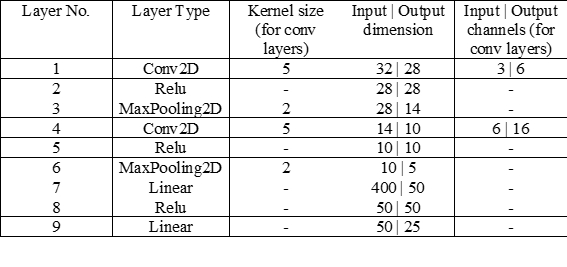

The students must:

1. Become familiar with the *BaseNet* architecture described above, the meaning of the different hyperparameters and the purpose of each layer. Create the code for the *BaseNet* model employing the fastai library, and using any of the techniques shown in the help guide.
2. Train the model and compute the values of “accuracy” and loss function for both training and test sets. Present the results using the provided functions.

In [ ]:
# We get the CIFAR100 dataset
path = untar_data(URLs.CIFAR_100,force_download=True)

In [ ]:
# The CIFAR_100 dataset, as well as the MNIST dataset, follows a common layout for machine learning datasets: 
# separate folders for the training set and the validation set (and/or test set). 
# Let's see what's inside both the training and test sets
print(path)
print(path.ls())
print((path/'train').ls())
print((path/'test').ls())
train_classes = (path/'train').ls()
test_classes = (path/'test').ls()
print(len(train_classes))

/root/.fastai/data/cifar100
[Path('/root/.fastai/data/cifar100/train'), Path('/root/.fastai/data/cifar100/test')]
[Path('/root/.fastai/data/cifar100/train/large_man-made_outdoor_things'), Path('/root/.fastai/data/cifar100/train/large_carnivores'), Path('/root/.fastai/data/cifar100/train/trees'), Path('/root/.fastai/data/cifar100/train/medium_mammals'), Path('/root/.fastai/data/cifar100/train/small_mammals'), Path('/root/.fastai/data/cifar100/train/aquatic_mammals'), Path('/root/.fastai/data/cifar100/train/vehicles_2'), Path('/root/.fastai/data/cifar100/train/reptiles'), Path('/root/.fastai/data/cifar100/train/large_natural_outdoor_scenes'), Path('/root/.fastai/data/cifar100/train/people'), Path('/root/.fastai/data/cifar100/train/insects'), Path('/root/.fastai/data/cifar100/train/flowers'), Path('/root/.fastai/data/cifar100/train/vehicles_1'), Path('/root/.fastai/data/cifar100/train/fruit_and_vegetables'), Path('/root/.fastai/data/cifar100/train/household_electrical_devices'), Path('/ro

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. **The 100 classes in the CIFAR-100 are grouped into 20 superclasses**. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

In [ ]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Total training images:  50000
Total test images:  10000


We now keep the first 25 classes. To do so, we remove the last 75 from the dataset.

In [ ]:
#https://stackoverflow.com/questions/185936/how-to-delete-the-contents-of-a-folder
import shutil
number_of_classes_to_keep = 25
number_of_superclasses_to_keep = int(number_of_classes_to_keep/5)
print('SUPERCLASSES DELETED:')
for i in range(number_of_superclasses_to_keep,len(train_classes)):
  print(train_classes[i])
  shutil.rmtree(train_classes[i]) 
print('SUPERCLASSES KEPT:')
for i in range(number_of_superclasses_to_keep):
  print(train_classes[i])

SUPERCLASSES DELETED:
/root/.fastai/data/cifar100/train/aquatic_mammals
/root/.fastai/data/cifar100/train/vehicles_2
/root/.fastai/data/cifar100/train/reptiles
/root/.fastai/data/cifar100/train/large_natural_outdoor_scenes
/root/.fastai/data/cifar100/train/people
/root/.fastai/data/cifar100/train/insects
/root/.fastai/data/cifar100/train/flowers
/root/.fastai/data/cifar100/train/vehicles_1
/root/.fastai/data/cifar100/train/fruit_and_vegetables
/root/.fastai/data/cifar100/train/household_electrical_devices
/root/.fastai/data/cifar100/train/food_containers
/root/.fastai/data/cifar100/train/large_omnivores_and_herbivores
/root/.fastai/data/cifar100/train/household_furniture
/root/.fastai/data/cifar100/train/non-insect_invertebrates
/root/.fastai/data/cifar100/train/fish
SUPERCLASSES KEPT:
/root/.fastai/data/cifar100/train/large_man-made_outdoor_things
/root/.fastai/data/cifar100/train/large_carnivores
/root/.fastai/data/cifar100/train/trees
/root/.fastai/data/cifar100/train/medium_mammals

In [ ]:
# We also remove the same superclasses from the test set
for i in range(number_of_superclasses_to_keep,len(test_classes)):
  print(test_classes[i])
  shutil.rmtree(test_classes[i]) 

/root/.fastai/data/cifar100/test/aquatic_mammals
/root/.fastai/data/cifar100/test/vehicles_2
/root/.fastai/data/cifar100/test/reptiles
/root/.fastai/data/cifar100/test/large_natural_outdoor_scenes
/root/.fastai/data/cifar100/test/people
/root/.fastai/data/cifar100/test/insects
/root/.fastai/data/cifar100/test/flowers
/root/.fastai/data/cifar100/test/vehicles_1
/root/.fastai/data/cifar100/test/fruit_and_vegetables
/root/.fastai/data/cifar100/test/household_electrical_devices
/root/.fastai/data/cifar100/test/food_containers
/root/.fastai/data/cifar100/test/large_omnivores_and_herbivores
/root/.fastai/data/cifar100/test/household_furniture
/root/.fastai/data/cifar100/test/non-insect_invertebrates
/root/.fastai/data/cifar100/test/fish


Now we verify if we have removed them correctly. 

In [ ]:
print(path)
train_classes = (path/'train').ls()
test_classes = (path/'test').ls()
print(len(train_classes))
print(len(test_classes))

/root/.fastai/data/cifar100
5
5


And that the number of examples is correct

In [ ]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Total training images:  12500
Total test images:  2500


Now we should have 12500 images for training and 2500 images for testing. 

Next, we should employ DataLoaders and DataBlock to load the data. 

En primer lugar, creamos el DataBlock usando el 10% de las imágenes de training para validación.

Setting-up type transforms pipelines
Found 12500 items
2 datasets of sizes 11250,1250
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/cifar100/train/vehicles_1/bus/minibus_s_001842.png
    applying PILBase.create gives
      PILImage mode=RGB size=32x32
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/cifar100/train/vehicles_1/bus/minibus_s_001842.png
    applying parent_label gives
      bus
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(4)

Final sample: (PILImage mode=RGB size=32x32, TensorCategory(4))


Found 12500 items
2 datasets of sizes 11250,1250
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na

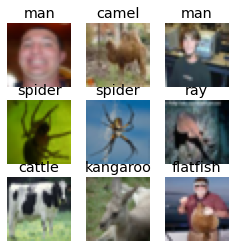

In [ ]:
#Code to be done by the students. 
# Data block
CIFARdb = DataBlock(blocks = (ImageBlock,CategoryBlock),
                    get_items = get_image_files,
                    get_y = parent_label,
                    splitter = RandomSplitter(valid_pct=0.1, seed=42))

# Data load
CIFARtraindl = CIFARdb.dataloaders(path/'train')

# Show batch
CIFARtraindl.show_batch(max_n=9, figsize=(4,4)) # shows a batch of images

# Summary
CIFARdb.summary(path/'train')

Ahora, creamos el modelo como lo indica el ejercicio usando nn.Sequential. Creamos el learner usando usando como modelo el que acabamos de implementar y con función de pérdida CrossEntropyLoss. Una vez creado el learner, entrenamos por tres épocas y obtenemos los resultados.

0.00363078061491251


epoch,train_loss,valid_loss,accuracy,time
0,2.902975,2.803079,0.190400,00:17
1,2.556278,2.422589,0.286400,00:12
2,2.345963,2.336454,0.309600,00:12


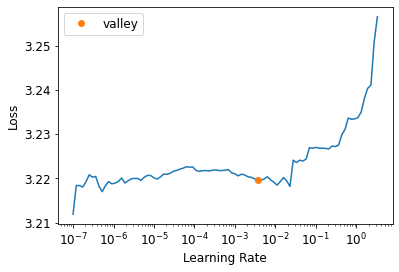

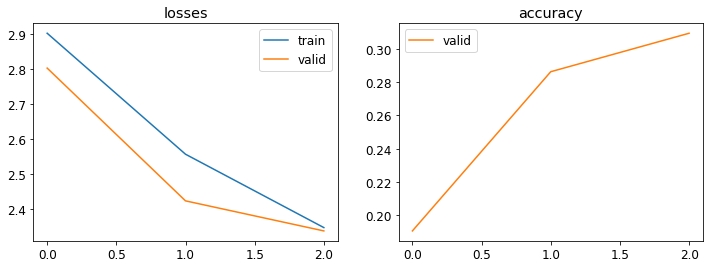

Sequential (Input shape: 64 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 6 x 28 x 28    
Conv2d                                    456        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 6 x 14 x 14    
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 16 x 10 x 10   
Conv2d                                    2416       True      
ReLU                                                           
____________________________________________________________________________
                     64 x 16 x 5 x 5     
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 400    

In [ ]:
from fastai.test_utils import *

# Creamos el modelo
net = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5,5)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(in_features=400, out_features=50),
    nn.ReLU(),
    nn.Linear(in_features=50, out_features=25)
)

# Construimos el learner
from torch.nn.modules.loss import CrossEntropyLoss
learn = Learner(CIFARtraindl, net, metrics=accuracy, loss_func=CrossEntropyLoss())
lr=learn.lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])
learn.fit_one_cycle(n_epoch=3, lr_max=lr[0]) # running the optimizer one-cycle
learn.recorder.plot_metrics() # shows accuracy curve along epochs
learn.summary() # show all details

Now, we want to check the performance of our trained model in testing

Por último, creamos el DataLoad de las imágenes de test y calculamos la precisión del modelo.

In [ ]:
doc(learn.dls.test_dl)
# We create the test dataloader
test_dl = learn.dls.test_dl(files_test, with_labels=True)

In [ ]:
# We can check that we have indeed 2500 test examples
test_dl.show

<bound method Datasets.show of (#2500) [(PILImage mode=RGB size=32x32, TensorCategory(18)),(PILImage mode=RGB size=32x32, TensorCategory(18)),(PILImage mode=RGB size=32x32, TensorCategory(18)),(PILImage mode=RGB size=32x32, TensorCategory(18)),(PILImage mode=RGB size=32x32, TensorCategory(18)),(PILImage mode=RGB size=32x32, TensorCategory(18)),(PILImage mode=RGB size=32x32, TensorCategory(18)),(PILImage mode=RGB size=32x32, TensorCategory(18)),(PILImage mode=RGB size=32x32, TensorCategory(18)),(PILImage mode=RGB size=32x32, TensorCategory(18))...]>

In [ ]:
doc(learn.get_preds)
# We perform prediction on this bunch of data
# Si quiero que devuelva una 3-upla, debo poner with_decoded=True
#preds, targs, _ = learn.gre_preds(dl=test_dl, with_decoded=True)
preds, targs = learn.get_preds(dl=test_dl)

In [ ]:
acc = accuracy(preds, targs)
print('The test accuracy is : ', round(float(acc)*100, 4), '%')

The test accuracy is :  30.52 %


Vemos que para esta configuración, obtenemos alrededor del 30% de precisión.



---



---



---



# **Exercise 2:** **Improvement of the BaseNet model (3 points)**
Now the goal is to create, by making judicious architectural and implementation choices, an enhanced deep network based on *BaseNet*. A good combination of layers can make the accuracy of the new model close to 50% on our CIFAR100 data. To enhance your network, you may consider adding any combination of the following enhancement options:
1. **Data normalization**. Scale normalization of the input data, in general, makes training easier and more robust. Use the DataLoader or ImageDataLoaders class with the correct parameters so that the data is well conditioned (mean=0, stddev=1) to improve training. You must ensure that test_transform uses the same normalization parameters as train_transform.
2. **Batch normalization**. Batch-normalization layers in most cases help to reduce overfitting and improve model training. Add normalization layers after convolutional layers and before the ReLU layer, but try including it after ReLU layers as well.
3. **Depth increase**. Experiment adding convolutional layers. Do not always put a maxpool layer after each conv layer, as this leads to excessive loss of information by reducing the number of units. If needed use UpSampling (Transposed Convolution) layers to increase the number of units.
4. **Dropout**. This layer introduces regularization by randomly selecting a percentage of active neurons for each mini-batch. This helps the network to specialize neurons in specific and independent information.
5. **Early Stopping**. After how many epochs we should stop training? This answer on stack-exchange (https://datascience.stackexchange.com/questions/18339/why-use-both-validation-set-and-test-set/18346#18346) is a good summary of using train-val-test splits to reduce overfitting. This blog (https://elitedatascience.com/overfitting-in-machine-learning#how-to-prevent) is also a good reference for “early stopping”. Very important: keep in mind that you should never use the test set for anything other than the final evaluation. You should decide for how many epochs you will train your model by looking at the training loss and validation accuracy plots (to do so, evaluate the local minima/maxima of the loss function as well as the classification accuracy). Remember that if you choose too many epochs it would quite likely lead to overfitting, while if you select too few your model quite likely won't  learn enough. In your report, you must include a table similar to the one shown in Exercise 1 to illustrate the architecture of your final improved network. In addition, you must explain the steps taken with the partial results obtained that have finally led you to introduce the proposed modifications.
6. **Data augmentation**.  Use the DataLoader or ImageDataLoaders class data zoom parameters, like zoom_range and/or horizontal_flip. Remember that you should not have any data augmentation in the validation or test sets. If you need a better understanding, try reading Fastai's tutorial on transformations. Look at data augmentation using image transformations.

Para conseguir lo que pide el ejercicio (obtener más del 50% de accuracy en nuestra base de datos), fui realizando las siguientes modificaciones.

En primer lugar, opté por añadir más ciclos de entrenamiento (10), y obtuve una precisión del 40%. 

Viendo que había incrementado bastante, opté por añadir aún más ciclos (25), pero la precisión seguía siendo la misma, por lo que decidí añadir dos capas más totalmente totalmente conectadas, y la precisión subió al 47%. 

Habiendo realizado esto, decidí incluir BatchNormalization y Dropout en las capas totalmente conectadas, y en cuanto al DataBlock incluí una transformación del batch, normalización a las estadísticas de Imagenet. Con esto, la precisión subió solo un 1%.

Continué modificando el DataBlock, añadiendo transformaciones de los items y añadiendo transformaciones del batch. Concretamente, añadí Resize, RandomResizedCrop y Data Augmentation con *aug_transform(). También subí el número de épocas de entrenamiento a 30 y añadí Early Stopping. Con esto la precisión seguía siendo del 48%, por lo que decidí añadir más capas convolucionales. Con esto, la precisión era del 58%.

Opté por cambiar MaxPooling por AdaptiveAvgPooling y por AvgPooling pero no mejoraba la red.

Para terminar, cambiando parámetros de las capas convolucionales y ajustando la red, obtuve una precisión de alrededor del 62%.

Y finalmente, eliminé RandomResizeCrop y obtuve una precisión del 67%.

(Todos los parámetros de las capas convolucionales, redes totalmente conectadas y cualquier propiedad de la red han sido ajustados probando hasta obtener una buena precisión).

Setting-up type transforms pipelines
Found 12500 items
2 datasets of sizes 11250,1250
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/cifar100/train/small_mammals/shrew/neomys_anomalus_s_000053.png
    applying PILBase.create gives
      PILImage mode=RGB size=32x32
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/cifar100/train/small_mammals/shrew/neomys_anomalus_s_000053.png
    applying parent_label gives
      shrew
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(18)

Final sample: (PILImage mode=RGB size=32x32, TensorCategory(18))


Found 12500 items
2 datasets of sizes 11250,1250
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab

0.0004786300996784121


epoch,train_loss,valid_loss,accuracy,time
0,2.763090,2.565229,0.277600,00:30
1,2.535641,2.376512,0.325600,00:29
2,2.372572,2.234857,0.358400,00:30
3,2.212942,2.196415,0.356800,00:29
4,2.106676,2.026675,0.366400,00:29
5,1.982264,1.927958,0.392000,00:29
6,1.885865,1.815745,0.450400,00:31
7,1.757221,1.662013,0.492000,00:30
8,1.667174,1.799115,0.456800,00:29
9,1.529885,1.500489,0.543200,00:29


No improvement since epoch 23: early stopping


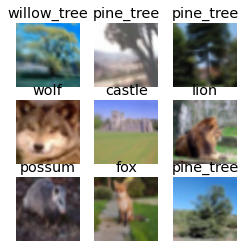

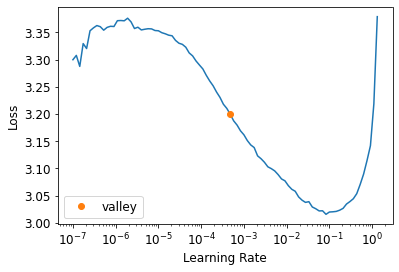

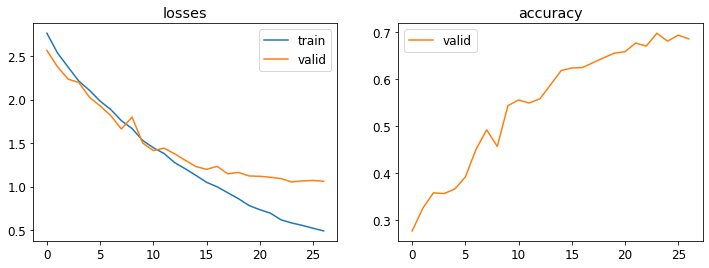

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 6 x 220 x 220  
Conv2d                                    456        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 6 x 110 x 110  
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 16 x 106 x 106 
Conv2d                                    2416       True      
ReLU                                                           
____________________________________________________________________________
                     64 x 16 x 53 x 53   
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 64 x 

In [19]:
from torch.nn.modules.dropout import Dropout
#Code to be done by the students.
from fastai.vision.all import * 
# Data block
CIFARdb = DataBlock(blocks = (ImageBlock,CategoryBlock),
                    get_items = get_image_files,
                    get_y = parent_label,
                    splitter = RandomSplitter(valid_pct=0.1, seed=42),
                    item_tfms=[Resize(224,method='squish')], # Crop image patches and resize to imagenet size
                    batch_tfms=[Normalize.from_stats(*imagenet_stats),*aug_transforms()])  # normalize with the Imagenet  values and applies data augmentation
# Data load
CIFARtraindl = CIFARdb.dataloaders(path/'train')

# Show batch
CIFARtraindl.show_batch(max_n=9, figsize=(4,4)) # shows a batch of images

# Summary
CIFARdb.summary(path/'train')

net = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5,5)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(in_channels=16, out_channels=64, kernel_size=(5,5)),
    nn.MaxPool2d(kernel_size=2),
    nn.ReLU(),
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3)),
    nn.MaxPool2d(kernel_size=2),
    nn.ReLU(),
    nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3)),
    nn.MaxPool2d(kernel_size=2),
    nn.ReLU(),
    nn.Flatten(),
    nn.BatchNorm1d(4096),
    nn.Dropout(0.15),
    nn.Linear(in_features=4096, out_features=4096),
    nn.ReLU(),
    nn.BatchNorm1d(4096),
    nn.Dropout(0.15),
    nn.Linear(in_features=4096, out_features=400),
    nn.ReLU(),
    nn.BatchNorm1d(400),
    nn.Dropout(0.15),
    nn.Linear(in_features=400, out_features=50),
    nn.ReLU(),
    nn.BatchNorm1d(50),
    nn.Linear(in_features=50, out_features=25))

# Construimos el learner
# Se usa por defecto CrossEntropyLoss
from torch.nn.modules.loss import CrossEntropyLoss
learn = Learner(CIFARtraindl, net, metrics=accuracy, loss_func=CrossEntropyLoss())
lr=learn.lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])
learn.fit_one_cycle(n_epoch=30, lr_max=lr[0], cbs=EarlyStoppingCallback(min_delta=0.01,patience=3, reset_on_fit=True)) # running the optimizer one-cycle
learn.recorder.plot_metrics() # shows accuracy curve along epochs
learn.summary() # show all details

In [20]:
test_dl = learn.dls.test_dl(files_test, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)

acc = accuracy(preds, targs)
print('The test accuracy is : ', round(float(acc)*100, 4), '%')

The test accuracy is :  66.64 %


---



---



---

# **Exercise  3: Model transfer and fine-tuning with ResNet18 for the Caltech-UCSD Birds-200-2011 database (3 points)**
In this exercise we will work with the Caltech-UCSD Birds-200-2011 dataset (https://www.vision.caltech.edu/datasets/cub_200_2011/). This dataset consists of 11,788 images of 200 bird species. It has 200 classes, with 5,994 for training and 5,794 for testing. Again, 10% of the training set will be left for validation. Read the dataset using the provided functions.

We will use the ResNet18 network model already pre-trained with ImageNet, it can be downloaded from the Fastai Model repository. You have to:
1. **Use ResNet18 as a feature extractor** for the Caltech-UCSD Birds-200-2011 dataset. To do this we will remove at least the head of the downloaded model, we will add some additional convolutional blocks and a new head. Specifically, students have to perform the following experiments:
    
    **1.1.** Download and adapt the ResNet18 model trained with ImageNet to the Caltech-UCSD dataset, retrain this new fully connected layer, and estimate the network performance. 
    
    **1.2.** Remove the head of the model and add new convolutional blocks and a new head designed by you. Retrain your model with Caltech-UCSD. 
    
    **1.3.** Compare the results obtained in 1.2 and 1.1.

  Remember that, during training, you have to freeze the weights in the feature extraction blocks.

2. **Make a fine-tuning of the entire ResNet18 network** for  Caltech-UCSD. Remember that the number of epochs for fine-tuning must be small.





In [ ]:
# https://docs.fast.ai/data.external.html
path = untar_data(URLs.CUB_200_2011)

In [ ]:
# We explore a little bit the folders and number of examples.
# train_test_split.txt contains the information about which images are for training and which ones are for testing
print(path)
print(path.ls())
print((path/'CUB_200_2011/').ls())
train_test_split = np.loadtxt('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt',dtype=int)

print('Number of testing examples: ', (train_test_split[:,1]== 0).sum())
print('Number of training examples: ', (train_test_split[:,1]== 1).sum())
print(train_test_split)

/root/.fastai/data/CUB_200_2011
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011'), Path('/root/.fastai/data/CUB_200_2011/attributes.txt')]
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/parts'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/README'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt')]
Number of testing examples:  5794
Number of training examples:  5994
[[    1     0]
 [    2     1]
 [    3     0]
 ...
 [11786     0]
 [11787     1]
 [11788     0]]


In [ ]:
# images.txt contains the numbered list of all images. Combining the information in images.txt and train_test_split.txt we can 
# get the actual images for training and test. First, we read the images.txt file. 
with open('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt') as file:
    images_list = file.readlines()
    images_list = [line.rstrip() for line in images_list]
print(images_list)

['1 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg', '2 001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg', '3 001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg', '4 001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg', '5 001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg', '6 001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg', '7 001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg', '8 001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg', '9 001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg', '10 001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg', '11 001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059.jpg', '12 001.Black_footed_Albatross/Black_Footed_Albatross_0086_796062.jpg', '13 001.Black_footed_Albatross/Black_Footed_Albatross_0049_796063.jpg', '14 001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065.jpg', '15 001.Black_footed_Albatr

In [ ]:
# We check if all classes are more or less equally well represented. 
classes = (path/'CUB_200_2011/images/').ls()
print('Number of examples per class')
for i in range(len(classes)):
  print(len(classes[i].ls()), end=" ")

Number of examples per class
60 60 59 60 60 60 44 59 59 60 60 60 60 60 60 60 60 56 56 60 60 60 60 60 60 59 60 59 60 60 60 59 60 60 59 60 60 49 60 59 60 53 59 59 60 60 60 58 60 60 60 59 59 60 60 60 60 60 60 58 60 60 60 60 58 60 57 60 60 60 60 59 50 60 59 60 60 60 60 60 60 60 60 60 60 60 60 60 59 59 60 60 60 60 60 56 60 53 60 60 60 59 60 60 60 50 60 60 60 60 58 60 60 60 60 51 60 60 59 60 59 59 60 60 60 60 60 60 50 60 60 60 60 60 59 50 60 60 60 60 59 60 60 60 60 60 52 60 60 48 59 60 60 60 60 60 59 59 60 60 60 60 53 60 60 58 45 60 41 60 60 60 57 59 60 60 60 60 60 60 58 59 60 59 59 60 60 60 60 60 60 59 60 60 60 60 60 59 60 60 

In [ ]:
print(path)
import shutil, os
# If we already have these folders, we remove them because we want to create them from scratch
if os.path.isdir('/root/.fastai/data/CUB_200_2011/train'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/train')
if os.path.isdir('/root/.fastai/data/CUB_200_2011/test'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/test')

# We copy all images in two folders (train and test). Initially, both folders contain the same information.
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/train')
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/test')

/root/.fastai/data/CUB_200_2011


'/root/.fastai/data/CUB_200_2011/test'

In [ ]:
# Now we remove from training those images belonging to test, and we remove
# from test those images belonging to train. 
import os 
for i in range(len(train_test_split)):
    if train_test_split[i,1]==0: #test image
       os.remove(path/'train'/images_list[i].rsplit(' ')[1]) #we remove it from train
    if train_test_split[i,1]==1: #train image
      os.remove(path/'test'/images_list[i].rsplit(' ')[1]) #we remove it from test

In [ ]:
# We list the number of images in the folders to check if we actually have 5,994 images for training and 5,794 for testing
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Total training images:  5994
Total test images:  5794


Construimos el DataBlock. En este caso, es obligatorio hacer Resize(224) porque las imágenes de la base de datos son de distintos tamaños. Además, he elegido 224 porque es el tamaño de las imagenes en ImageNet, la base de datos en la que ResNet18 fue entrenada.

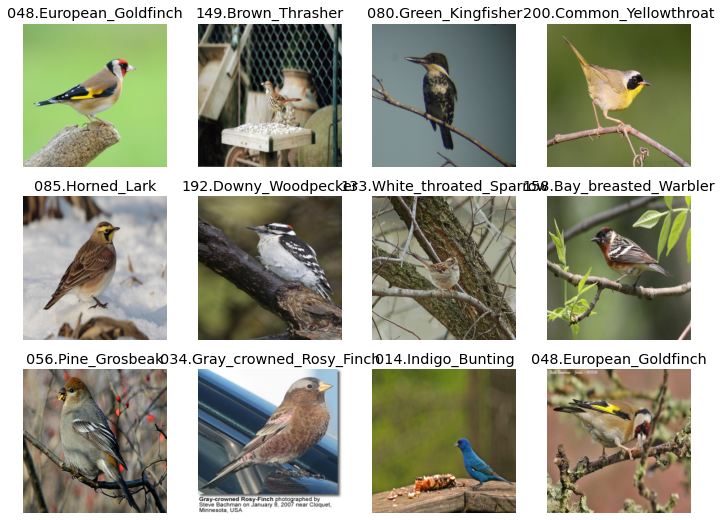

In [ ]:
from fastai.test_utils import *
# Creamos el DataBlock
CALTECHdb = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.1, seed=42), #10% of the training set will be used for validation
    get_y=parent_label,
    item_tfms = Resize(300, method='squish'),
    batch_tfms = [IntToFloatTensor()]#, Normalize.from_stats(*imagenet_stats), *aug_transforms()] # Normalize data with ImageNet stats
)

CALTECHtraindl = CALTECHdb.dataloaders(path/'train',batch_size=64) 

CALTECHtraindl.show_batch(max_n=12)

En primer lugar, usamos ResNet18 de base, y obtenemos una precisión del 65%.

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

0.0008317637839354575


epoch,train_loss,valid_loss,accuracy,time
0,6.917660,5.242847,0.025042,00:51
1,5.291392,3.279974,0.262103,00:49
2,3.451843,2.180472,0.459098,00:52
3,2.269675,1.767163,0.535893,00:51
4,1.611904,1.570529,0.574290,00:49
5,1.262248,1.486171,0.616027,00:51
6,1.033443,1.407977,0.634391,00:51
7,0.893232,1.376624,0.637730,00:50
8,0.814148,1.370821,0.644407,00:52
9,0.763681,1.371737,0.636060,00:51


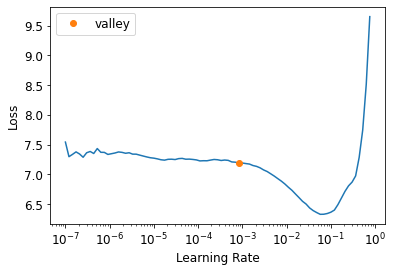

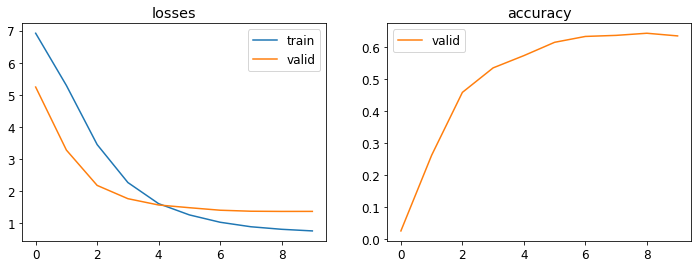

Sequential (Input shape: 64 x 3 x 300 x 300)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 150 x 150 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 75 x 75   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [ ]:
from torch.nn.modules.loss import CrossEntropyLoss
learn = vision_learner(CALTECHtraindl, fastai.vision.models.resnet18, metrics=accuracy, loss_func=CrossEntropyLoss())
lr=learn.lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])
learn.fit_one_cycle(n_epoch=10, lr_max=lr[0]) # running the optimizer one-cycle
learn.recorder.plot_metrics() # shows accuracy curve along epochs
learn.summary()

In [ ]:
test_dl = learn.dls.test_dl(files_test, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)

acc = accuracy(preds, targs)
print('The test accuracy is : ', round(float(acc)*100, 4), '%')

The test accuracy is :  65.1191 %


En segundo lugar, creamos una head personalizada que añadiremos a ResNet18. Concretamente, esta consiste en dos módulos convolucionales y una capa totalmente conectada. Con esta configuración, obtenemos un 54%.

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


5.248074739938602e-05


epoch,train_loss,valid_loss,accuracy,time
0,5.298057,4.778400,0.051753,00:56
1,3.373322,2.902707,0.343907,00:57
2,1.414103,2.205404,0.465776,00:53
3,0.421696,2.049415,0.504174,00:55
4,0.133915,1.971170,0.512521,00:55
5,0.056975,1.926724,0.542571,00:53
6,0.032332,1.909793,0.530885,00:54
7,0.022734,1.884882,0.537563,00:55
8,0.018435,1.882765,0.534224,00:56
9,0.016611,1.874998,0.530885,00:54


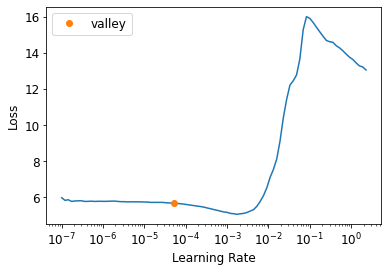

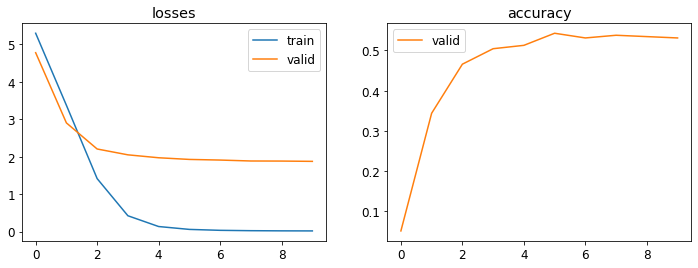

Sequential (Input shape: 64 x 3 x 300 x 300)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 150 x 150 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 75 x 75   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [ ]:
from torch.nn.modules.loss import CrossEntropyLoss
custom_head = nn.Sequential(
    nn.Conv2d(in_channels=512, out_channels=800, kernel_size=(3,3)),
    nn.BatchNorm2d(800),
    nn.ReLU(),
    nn.Conv2d(in_channels=800, out_channels=1024, kernel_size=(5,5)),
    nn.BatchNorm2d(1024),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(16384,200)
)

learn = vision_learner(CALTECHtraindl, fastai.vision.models.resnet18, custom_head=custom_head, metrics=accuracy, loss_func=CrossEntropyLoss())
lr=learn.lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])
learn.fit_one_cycle(n_epoch=10, lr_max=lr[0]) # running the optimizer one-cycle
learn.recorder.plot_metrics() # shows accuracy curve along epochs
learn.summary()

In [ ]:
test_dl = learn.dls.test_dl(files_test, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)

acc = accuracy(preds, targs)
print('The test accuracy is : ', round(float(acc)*100, 4), '%')

The test accuracy is :  54.4529 %


He obtenido una precisión menor en el caso de incluir yo una cabeza personalizada. Esto es debido a que la cabeza que he añadido tiene menos capas convolucionales y menos módulos que la cabeza por defecto que añade fastai, por lo que tiene sentido que obtengamos una precisión menor.


Por último, realizamos un ajuste fino, con 3 épocas congelando los parámetros y 7 épocas sin congelarlos. Con esto obtenemos una precisión del 67%

In [ ]:
from torch.nn.modules.loss import CrossEntropyLoss
model = create_vision_model(fastai.vision.models.resnet18, 200, True, n_in=3)
learn = Learner(CALTECHtraindl,model,metrics=accuracy,loss_func=CrossEntropyLoss())
learn.fine_tune(7, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,5.891685,4.387875,0.115192,00:54
1,4.136531,3.423457,0.212020,00:54
2,3.380084,3.785111,0.202003,00:51


epoch,train_loss,valid_loss,accuracy,time
0,1.822586,2.037983,0.462437,00:53
1,1.811101,2.674741,0.362270,00:54
2,1.577328,2.347420,0.420701,00:52
3,1.022461,1.830207,0.517529,00:54
4,0.524592,1.401799,0.626043,00:53
5,0.236356,1.268915,0.666110,00:51
6,0.122022,1.251049,0.677796,00:54


In [ ]:
test_dl = learn.dls.test_dl(files_test, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)

acc = accuracy(preds, targs)
print('The test accuracy is : ', round(float(acc)*100, 4), '%')

The test accuracy is :  67.1384 %


En este caso, podemos ver que haciendo fine tuning obtenemos mejor precisión aunque no se aleja mucho de lo obtenido en el apartado 3.1.1. Esto es debido a que en lugar de entrenar la red de principio a fin (como haríamos en el apartado 3.1.1), partimos de unos pesos y la red se ajusta en base a dichos pesos, en lugar de partir de unos pesos inicializados aleatoriamente.

Podemos observar que, en las primeras épocas, obtenemos muchísima más precisión si realizamos fine tune.

---



---



---

# **Bonus. (3 points)**  

There are many other possibilities to improve the *BaseNet* model over CIFAR100 using suitable combinations of layers. Feel free to try your own ideas, or those interesting machine learning and computer vision approaches you've read about. Student proposals are expected for discussion and clear definition. Each proposal will be evaluated based on its innovation, complexity, and good use of PyTorch+Fastai. We will also take the mastering of the libraries used in the experiment into consideration.

**Note 1**: The Bonus will only be taken into account if, at least, 75% of the compulsory part is correct. 

**Note 2**: Since Colab only offers limited computational resources, students must try to rationally limit training time, memory consumption and size of the models used. The use of good coding practices is highly advised.

In [4]:
import torch
from torch.nn.modules.loss import CrossEntropyLoss

In [5]:
# We get the CIFAR100 dataset
path = untar_data(URLs.CIFAR_100,force_download=True)

In [6]:
# The CIFAR_100 dataset, as well as the MNIST dataset, follows a common layout for machine learning datasets: 
# separate folders for the training set and the validation set (and/or test set). 
# Let's see what's inside both the training and test sets
print(path)
print(path.ls())
print((path/'train').ls())
print((path/'test').ls())
train_classes = (path/'train').ls()
test_classes = (path/'test').ls()
print(len(train_classes))

/root/.fastai/data/cifar100
[Path('/root/.fastai/data/cifar100/train'), Path('/root/.fastai/data/cifar100/test')]
[Path('/root/.fastai/data/cifar100/train/large_man-made_outdoor_things'), Path('/root/.fastai/data/cifar100/train/large_carnivores'), Path('/root/.fastai/data/cifar100/train/trees'), Path('/root/.fastai/data/cifar100/train/medium_mammals'), Path('/root/.fastai/data/cifar100/train/small_mammals'), Path('/root/.fastai/data/cifar100/train/aquatic_mammals'), Path('/root/.fastai/data/cifar100/train/vehicles_2'), Path('/root/.fastai/data/cifar100/train/reptiles'), Path('/root/.fastai/data/cifar100/train/large_natural_outdoor_scenes'), Path('/root/.fastai/data/cifar100/train/people'), Path('/root/.fastai/data/cifar100/train/insects'), Path('/root/.fastai/data/cifar100/train/flowers'), Path('/root/.fastai/data/cifar100/train/vehicles_1'), Path('/root/.fastai/data/cifar100/train/fruit_and_vegetables'), Path('/root/.fastai/data/cifar100/train/household_electrical_devices'), Path('/ro

In [7]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Total training images:  50000
Total test images:  10000


In [8]:
#https://stackoverflow.com/questions/185936/how-to-delete-the-contents-of-a-folder
import shutil
number_of_classes_to_keep = 25
number_of_superclasses_to_keep = int(number_of_classes_to_keep/5)
print('SUPERCLASSES DELETED:')
for i in range(number_of_superclasses_to_keep,len(train_classes)):
  print(train_classes[i])
  shutil.rmtree(train_classes[i]) 
print('SUPERCLASSES KEPT:')
for i in range(number_of_superclasses_to_keep):
  print(train_classes[i])

SUPERCLASSES DELETED:
/root/.fastai/data/cifar100/train/aquatic_mammals
/root/.fastai/data/cifar100/train/vehicles_2
/root/.fastai/data/cifar100/train/reptiles
/root/.fastai/data/cifar100/train/large_natural_outdoor_scenes
/root/.fastai/data/cifar100/train/people
/root/.fastai/data/cifar100/train/insects
/root/.fastai/data/cifar100/train/flowers
/root/.fastai/data/cifar100/train/vehicles_1
/root/.fastai/data/cifar100/train/fruit_and_vegetables
/root/.fastai/data/cifar100/train/household_electrical_devices
/root/.fastai/data/cifar100/train/food_containers
/root/.fastai/data/cifar100/train/large_omnivores_and_herbivores
/root/.fastai/data/cifar100/train/household_furniture
/root/.fastai/data/cifar100/train/non-insect_invertebrates
/root/.fastai/data/cifar100/train/fish
SUPERCLASSES KEPT:
/root/.fastai/data/cifar100/train/large_man-made_outdoor_things
/root/.fastai/data/cifar100/train/large_carnivores
/root/.fastai/data/cifar100/train/trees
/root/.fastai/data/cifar100/train/medium_mammals

In [9]:
# We also remove the same superclasses from the test set
for i in range(number_of_superclasses_to_keep,len(test_classes)):
  print(test_classes[i])
  shutil.rmtree(test_classes[i]) 

/root/.fastai/data/cifar100/test/aquatic_mammals
/root/.fastai/data/cifar100/test/vehicles_2
/root/.fastai/data/cifar100/test/reptiles
/root/.fastai/data/cifar100/test/large_natural_outdoor_scenes
/root/.fastai/data/cifar100/test/people
/root/.fastai/data/cifar100/test/insects
/root/.fastai/data/cifar100/test/flowers
/root/.fastai/data/cifar100/test/vehicles_1
/root/.fastai/data/cifar100/test/fruit_and_vegetables
/root/.fastai/data/cifar100/test/household_electrical_devices
/root/.fastai/data/cifar100/test/food_containers
/root/.fastai/data/cifar100/test/large_omnivores_and_herbivores
/root/.fastai/data/cifar100/test/household_furniture
/root/.fastai/data/cifar100/test/non-insect_invertebrates
/root/.fastai/data/cifar100/test/fish


In [10]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Total training images:  12500
Total test images:  2500


In [ ]:
from torch.nn.modules.dropout import Dropout
#Code to be done by the students.
from fastai.vision.all import * 
# Data block
CIFARdb = DataBlock(blocks = (ImageBlock,CategoryBlock),
                    get_items = get_image_files,
                    get_y = parent_label,
                    splitter = RandomSplitter(valid_pct=0.4, seed=42),
                    item_tfms=[Resize(224,method='squish')], # Crop image patches and resize to imagenet size
                    batch_tfms=[Normalize.from_stats(*imagenet_stats),*aug_transforms()])  # normalize with the Imagenet  values and applies data augmentation
# Data load
CIFARtraindl = CIFARdb.dataloaders(path/'train')

# Show batch
CIFARtraindl.show_batch(max_n=9, figsize=(4,4)) # shows a batch of images

# Summary
CIFARdb.summary(path/'train')

net = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5,5)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(in_channels=16, out_channels=64, kernel_size=(5,5)),
    nn.MaxPool2d(kernel_size=2),
    nn.ReLU(),
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3)),
    nn.MaxPool2d(kernel_size=2),
    nn.ReLU(),
    nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3)),
    nn.MaxPool2d(kernel_size=2),
    nn.ReLU(),
    nn.Flatten(),
    nn.BatchNorm1d(4096),
    nn.Dropout(0.15),
    nn.Linear(in_features=4096, out_features=4096),
    nn.ReLU(),
    nn.BatchNorm1d(4096),
    nn.Dropout(0.15),
    nn.Linear(in_features=4096, out_features=400),
    nn.ReLU(),
    nn.BatchNorm1d(400),
    nn.Dropout(0.15),
    nn.Linear(in_features=400, out_features=50),
    nn.ReLU(),
    nn.BatchNorm1d(50),
    nn.Linear(in_features=50, out_features=25))

learn = Learner(CIFARtraindl, net, metrics=accuracy, loss_func=CrossEntropyLoss())
lr=learn.lr_find() # find the maximum value for lr to use in the next call to the optimizer
print(lr[0])
learn.fit_one_cycle(n_epoch=30, lr_max=lr[0], cbs=EarlyStoppingCallback(min_delta=0.01,patience=3, reset_on_fit=True)) # running the optimizer one-cycle
learn.recorder.plot_metrics() # shows accuracy curve along epochs
learn.summary()

Setting-up type transforms pipelines
Found 12500 items
2 datasets of sizes 7500,5000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/cifar100/train/small_mammals/mouse/harvest_mouse_s_001144.png
    applying PILBase.create gives
      PILImage mode=RGB size=32x32
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/cifar100/train/small_mammals/mouse/harvest_mouse_s_001144.png
    applying parent_label gives
      mouse
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(9)

Final sample: (PILImage mode=RGB size=32x32, TensorCategory(9))


Found 12500 items
2 datasets of sizes 7500,5000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None,

0.0002290867705596611


epoch,train_loss,valid_loss,accuracy,time
0,2.955556,2.779386,0.215600,00:30
1,2.751690,2.590804,0.280800,00:29
2,2.578693,2.446085,0.313000,00:29


In [67]:
test_dl = learn.dls.test_dl(files_test, with_labels=True)

preds, targs = learn.get_preds(dl=test_dl)

acc = accuracy(preds, targs)
print('The test accuracy is : ', round(float(acc)*100, 4), '%')

The test accuracy is :  64.72 %


In [ ]:
# COPIA 67%
net = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5,5)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(in_channels=16, out_channels=64, kernel_size=(5,5)),
    nn.MaxPool2d(kernel_size=2),
    nn.ReLU(),
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3)),
    nn.MaxPool2d(kernel_size=2),
    nn.ReLU(),
    nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3)),
    nn.MaxPool2d(kernel_size=2),
    nn.ReLU(),
    nn.Flatten(),
    nn.BatchNorm1d(4096),
    nn.Dropout(0.15),
    nn.Linear(in_features=4096, out_features=4096),
    nn.ReLU(),
    nn.BatchNorm1d(4096),
    nn.Dropout(0.15),
    nn.Linear(in_features=4096, out_features=400),
    nn.ReLU(),
    nn.BatchNorm1d(400),
    nn.Dropout(0.15),
    nn.Linear(in_features=400, out_features=50),
    nn.ReLU(),
    nn.BatchNorm1d(50),
    nn.Linear(in_features=50, out_features=25))